In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

from sklearn.preprocessing import MinMaxScaler

os.chdir('/Users/ashleyyan/Downloads/stock-project/data')

In [2]:
df = pd.read_csv('s&p_data', index_col=0)
df

,time,open,high,low,close,RSI,EMAF,EMAM,MACD,MACD_histogram,MACD_signal,BBL,BBM,BBU,BBB,BBP,ATR
0,1682691720000,4154.25,4155.08,4154.01,4155.07,51.042931,4110.552406,4103.042216,40.147401,-19.377044,59.524445,4073.484635,4124.004999,4174.525363,2.450063,0.807450,1.654713
1,1682691780000,4154.99,4155.67,4154.50,4155.36,51.048384,4110.584526,4103.059525,40.150032,-19.363377,59.513408,4073.498004,4124.018451,4174.538899,2.450059,0.810187,1.620091
2,1682691840000,4155.37,4157.12,4155.35,4156.86,51.076577,4110.617698,4103.077325,40.153002,-19.349378,59.502380,4073.511676,4124.032450,4174.553224,2.450067,0.824892,1.630799
3,1682691900000,4156.95,4159.06,4156.88,4157.74,51.093107,4110.651478,4103.095411,40.156170,-19.335190,59.491360,4073.526292,4124.046980,4174.567668,2.450054,0.833458,1.671456
4,1682691960000,4157.69,4158.37,4156.96,4158.13,51.100432,4110.685513,4103.113619,40.159422,-19.320925,59.480347,4073.538470,4124.060944,4174.583419,2.450132,0.837167,1.652780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28191,1691439420000,4518.44,4518.44,4518.44,4518.44,49.865489,4528.342508,4527.763224,29.858297,-16.982033,46.840330,4486.482999,4549.408907,4612.334816,2.766333,0.253926,0.333931
28192,1691439480000,4518.44,4518.44,4518.44,4518.44,49.865489,4528.335409,4527.760139,29.849338,-16.981314,46.830651,4486.470310,4549.402738,4612.335166,2.766624,0.254000,0.310079
28193,1691439540000,4518.44,4518.44,4518.44,4518.44,49.865489,4528.328315,4527.757055,29.840382,-16.980591,46.820973,4486.457503,4549.396462,4612.335420,2.766915,0.254076,0.287930
28194,1691439600000,4518.44,4518.44,4518.44,4518.44,49.865489,4528.321227,4527.753973,29.831429,-16.979866,46.811295,4486.445056,4549.390493,4612.335929,2.767203,0.254148,0.267364


In [3]:
df['nextClose'] = df['close'].shift(-1)
df = df.dropna()

In [4]:
def plot_moving_averages(df):
    plt.plot(df['close'], label = 'close')
    plt.plot(df['EMAF'], label='12 day')
    plt.plot(df['EMAM'], label='26 day')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Moving Averages')
    plt.legend()
    plt.show()
    
def plot_macds(df):
    plt.plot(df['MACD'], label='MACD')
    plt.plot(df['MACD_signal'], label='Signal')
    plt.plot(df['MACD_histogram'], label='Histogram')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('MACD')
    plt.legend()
    plt.show()
    
def plot_bb(df):
    plt.plot(df['close'], label = 'close')
    plt.plot(df['BBL'], label='Lower')
    plt.plot(df['BBM'], label='Mid')
    plt.plot(df['BBU'], label='Upper')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Bollinger Bands')
    plt.legend()
    plt.show()

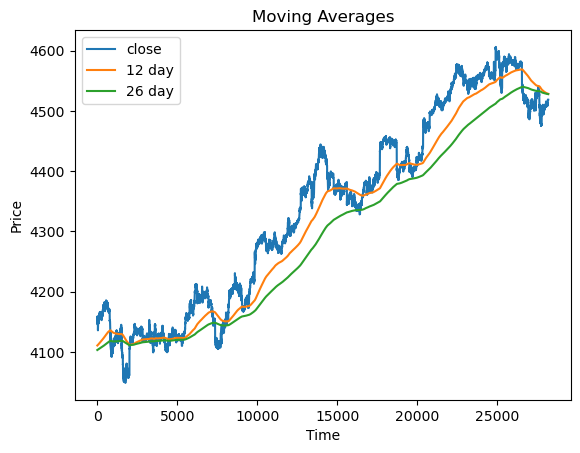

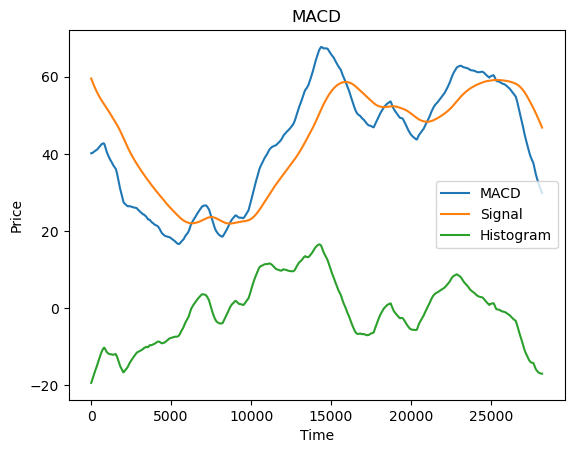

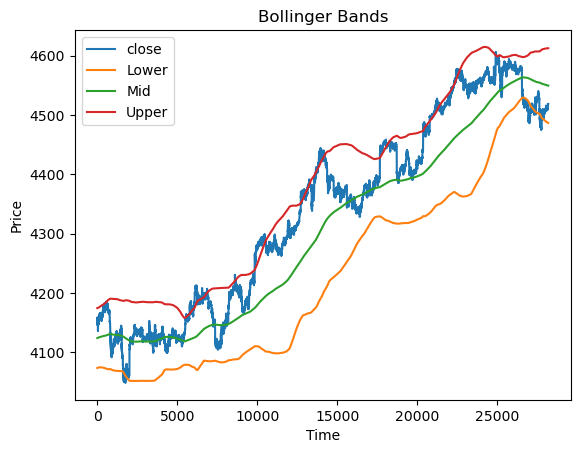

In [5]:
plot_moving_averages(df)
plot_macds(df)
plot_bb(df)

# Feature selection + engineering
In this section, I use correlation criteria to select the most relevant features for modeling. I use a heatmap to visualize the target's (close price) correlation with other variables, as well as correlations between other variables. If two variables are highly correlated with each other, I drop one of them since they are essentially duplicates. 

<Axes: >

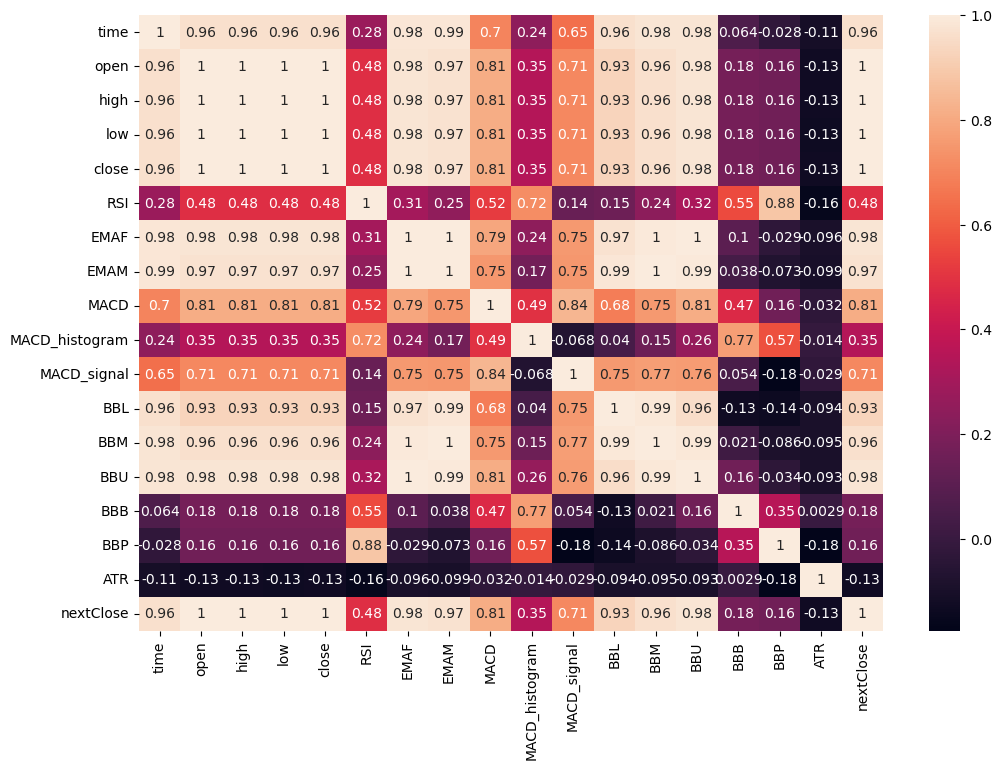

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cbar=True, annot=True)

In [8]:
df = df.drop(['time', 'open', 'high', 'low', 'EMAM', 'MACD_signal', 'BBL', 'BBM', 'BBB', 'BBP', 'ATR'], axis=1)
df

,close,RSI,EMAF,MACD,MACD_histogram,BBU,nextClose
0,4155.07,51.042931,4110.552406,40.147401,-19.377044,4174.525363,4155.36
1,4155.36,51.048384,4110.584526,40.150032,-19.363377,4174.538899,4156.86
2,4156.86,51.076577,4110.617698,40.153002,-19.349378,4174.553224,4157.74
3,4157.74,51.093107,4110.651478,40.156170,-19.335190,4174.567668,4158.13
4,4158.13,51.100432,4110.685513,40.159422,-19.320925,4174.583419,4157.61
...,...,...,...,...,...,...,...
28190,4518.44,49.865489,4528.349611,29.867259,-16.982750,4612.334428,4518.44
28191,4518.44,49.865489,4528.342508,29.858297,-16.982033,4612.334816,4518.44
28192,4518.44,49.865489,4528.335409,29.849338,-16.981314,4612.335166,4518.44
28193,4518.44,49.865489,4528.328315,29.840382,-16.980591,4612.335420,4518.44


In [9]:
# splitting data before normalizing to prevent data leakage
size = int(len(df)*0.8)
train_df = df[:size]
test_df = df[size:]
print(len(train_df))
print(len(test_df))

22556
5639


In [10]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_df)
scaled_test = scaler.fit_transform(test_df)

# Modeling

In [11]:
def create_backcandle_sequences(data, backcandles):
    X = []
    for j in range(data.shape[1] - 1):
        X.append([])
        for i in range(backcandles, data.shape[0]):
            X[j].append(data[i - backcandles:i, j])
    X = np.moveaxis(X, [0], [2])
    X = np.array(X)
    return X

In [12]:
backcandles = 20
X_train = create_backcandle_sequences(scaled_train, backcandles)
X_test = create_backcandle_sequences(scaled_test, backcandles)

In [13]:
y_train = np.array(scaled_train[backcandles:, -1])
y_train = np.reshape(y_train, (len(y_train), 1))

y_test = np.array(scaled_test[backcandles:, -1])
y_test = np.reshape(y_test, (len(y_test), 1))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22536, 20, 6)
(22536, 1)
(5619, 20, 6)
(5619, 1)


In [14]:
import tensorflow as tf
import keras

from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, LSTM, Input, Activation, Attention

from sklearn.metrics import mean_squared_error

2023-08-21 14:15:39.409922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
num_encoder_tokens = X_train.shape[2]  # number of input features
num_decoder_tokens = 1  # predicting single value (price)

# define hyperparameters
latent_dim = 50
batch_size = 100
epochs = 30
validation_split = 0.1

In [16]:
# Define the input sequence
encoder_inputs = Input(shape=(backcandles, num_encoder_tokens))

# LSTM layer
encoder = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(encoder_outputs, initial_state=encoder_states)

attention = Attention()
attention_output = attention([decoder_outputs, encoder_outputs])

# Dense layer
decoder_dense = Dense(num_decoder_tokens, activation='linear')
decoder_outputs = decoder_dense(attention_output)

2023-08-21 14:15:49.714118: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Define the model
model = Model(encoder_inputs, decoder_outputs)

# Compile the model
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mse')

# Train the model
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=validation_split)

Epoch 1/30


/Users/ashleyyan/anaconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-08-21 14:15:55.935730: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "110" frequency: 2000 num_cores: 8 environment { key: "cpu_instruction_set" value: "SSE, SSE2, SSE3, SSSE3" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 524288 l3_cache_size: 6291456 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


203/203 [==============================] - ETA: 0s - loss: 0.0531

2023-08-21 14:16:02.833097: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "110" frequency: 2000 num_cores: 8 environment { key: "cpu_instruction_set" value: "SSE, SSE2, SSE3, SSSE3" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 524288 l3_cache_size: 6291456 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


203/203 [==============================] - 10s 32ms/step - loss: 0.0531 - val_loss: 0.0123
Epoch 2/30
203/203 [==============================] - 6s 30ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/30
203/203 [==============================] - 6s 27ms/step - loss: 5.2418e-04 - val_loss: 5.0663e-04
Epoch 4/30
203/203 [==============================] - 6s 28ms/step - loss: 2.5162e-04 - val_loss: 0.0013
Epoch 5/30
203/203 [==============================] - 6s 28ms/step - loss: 1.7615e-04 - val_loss: 0.0014
Epoch 6/30
203/203 [==============================] - 6s 29ms/step - loss: 1.4611e-04 - val_loss: 0.0016
Epoch 7/30
203/203 [==============================] - 6s 28ms/step - loss: 1.2918e-04 - val_loss: 0.0013
Epoch 8/30
203/203 [==============================] - 6s 31ms/step - loss: 1.1814e-04 - val_loss: 0.0012
Epoch 9/30
203/203 [==============================] - 7s 34ms/step - loss: 1.1071e-04 - val_loss: 0.0010
Epoch 10/30
203/203 [==============================] - 6s 31ms/step -

In [18]:
y_pred = model.predict(X_test)

2023-08-21 14:19:10.073627: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "110" frequency: 2000 num_cores: 8 environment { key: "cpu_instruction_set" value: "SSE, SSE2, SSE3, SSSE3" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 49152 l2_cache_size: 524288 l3_cache_size: 6291456 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


176/176 [==============================] - 2s 7ms/step


In [19]:
y_pred = y_pred[:, -1, :]

In [20]:
print('Input shape: ' + f'{X_test.shape}')
print('Output shape: ' + f'{y_pred.shape}')

Input shape: (5619, 20, 6)
Output shape: (5619, 1)


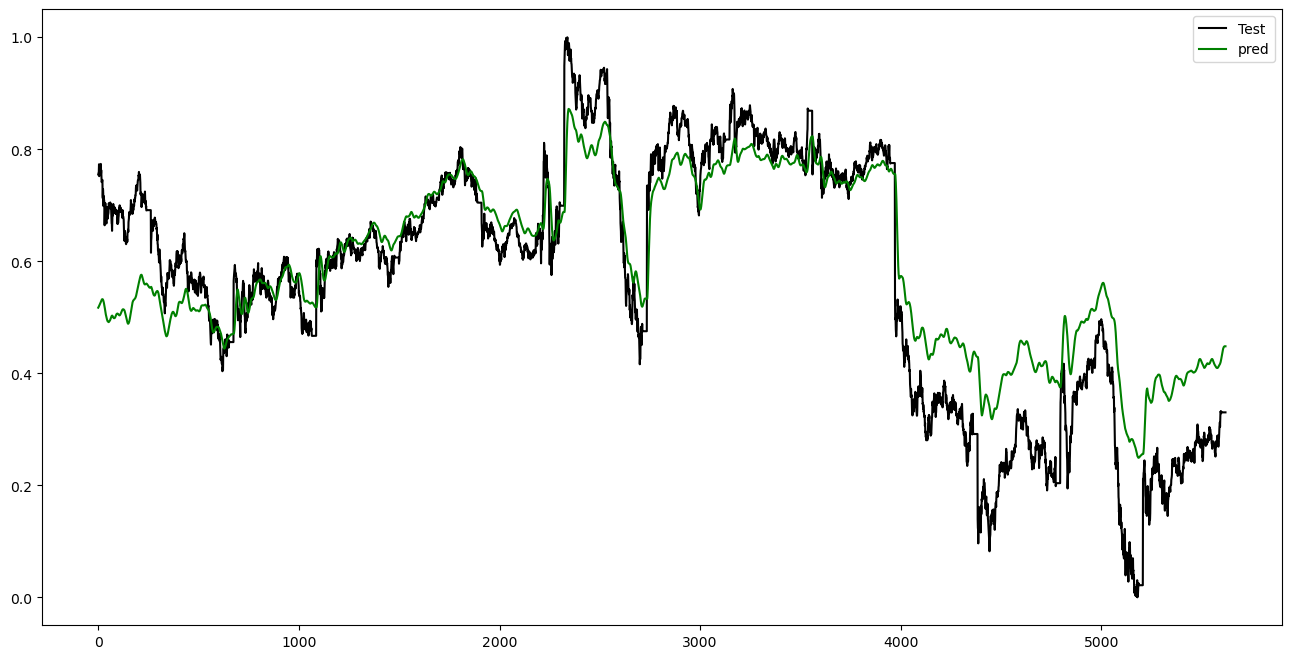

In [21]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

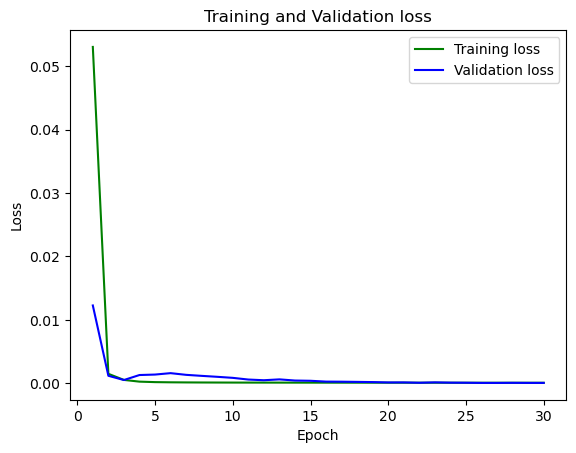

In [22]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
os.chdir('/Users/ashleyyan/Downloads/stock-project/models')

# save the iris classification model as a pickle file
model_pkl_file = "s&p_price_prediction_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://39063331-d53c-4d6c-ac6a-c39ca93b22ae/assets


INFO:tensorflow:Assets written to: ram://39063331-d53c-4d6c-ac6a-c39ca93b22ae/assets


# Trading algorithm implementation
This section is where I use the model's predictions to make decisions on whether to buy, sell, or hold stocks. 

In [22]:
# Generate trading signals
threshold = 0.5  # Set your threshold value
signals = []

for prediction in predicted_outputs:
    if prediction[-1][0] > threshold:
        signals.append('Buy')
    elif prediction[-1][0] < -threshold:
        signals.append('Sell')
    else:
        signals.append('Hold')

# Print generated signals
for i in range(len(signals)):
    print(f"Day {i}: {signals[i]}")

NameError: name 'predicted_outputs' is not defined

In [ ]:
# Try testing the lstm trained on AAPL stocks on other stocks
# consider alpha vantage api as the data pipeline since its free